## **Dataset**

In this Project , we will do data munging and analysis on a dataset about vehicle sharing. You can run the following code to download the dataset and load it into a `DataFrame` `trips`.

This dataset is generated from a vehicle sharing service. Every row represents a trip and has the following columns: 
- *Start Time* - The time when the trip started
- *End Time* - The time when the trip ended
- *Trip Duration* - Total time duration (in seconds) of the trip
- *Start Station* - Name of the trip's start station
- *End Station* - Name of the trip's end station
- *User Type* -  Type of the user. **Subscriber** refers to the users that subscribed to the service; **Customer** refers the users who take rides without any subscription. 
- *Birth Year* - The birth year of the user

In [462]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd

from itertools import chain

#For visualization. Matplotlib for basic visualization and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns




In [463]:
#load the file  vehicle_share.csv into a dataframe trips
trips = pd.read_csv('/content/vehicle_share.csv')
#return the first 5 rows of the dataset
trips.head()

,ID,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610.0,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0
1,961916,2017-05-26 09:41:44,2017-05-26 09:46:25,281.0,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983.0
2,1023296,2017-05-30 15:46:18,2017-05-30 15:52:12,354.0,Larrabee St & Kingsbury St,Clark St & Elm St,Subscriber,Male,1985.0
3,958716,2017-05-25 22:59:33,2017-05-25 23:07:19,466.0,Clark St & Armitage Ave,Sheffield Ave & Wrightwood Ave,Subscriber,Female,1985.0
4,718598,2017-05-03 13:20:38,2017-05-03 13:31:13,635.0,Ada St & Washington Blvd,Daley Center Plaza,Subscriber,Male,1967.0


Let's gain some basic understanding of the dataset

In [464]:
#For each task below, look for a Pandas function to do the task.


#Task a: Print the details of the df_data data frame (information such as dimensionality, names of features (note that there's no target variable here), statistical details, etc)


#Task b: Print the Name of the trip's end station used in the dataset with the number of their occurences


#Task c: Print the number of duplicated rows in the dataset and remove the duplicated rows


## **Need for data cleaning and preprocessing**

The results of these several functions indicate a few needs for cleaning and preprocessing the data:

1) The column `Birth Year` should be integer, but it has floating point values.

2) There are null values in a few columns. 

3) The values in columns `Start Time` and `End Time` are strings. We need to convert them to `datetime` values.


Let's find out which columns have null values. This could be derived from the `Non-Null Count` in the output of `trips.info()`. But there are simpler ways.

## **Task 1: For each column, find the number of rows with null value in that column.** 

If your code for this task is correct, its output should tell you that two columns have null values --- column `Gender` has missing value in 81676 rows and 81462 for column `Birth Year`. Other columns have no null values. 

In [465]:
# Code for Task 1
trips.isna().sum().reset_index(name='count of null values')

,index,count of null values
0,ID,0
1,Start Time,0
2,End Time,0
3,Trip Duration,0
4,Start Station,0
5,End Station,0
6,User Type,0
7,Gender,81676
8,Birth Year,81462




The `ID` column is not useful in our analysis. Hence, let's take it out. 

## **Task 2: Remove the `ID` column from the DataFrame `trips`.**

In [466]:
# Code for Task 2
trips.drop(columns=['ID'])

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,2017-05-25 18:19:03,2017-05-25 18:45:53,1610.0,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0
1,2017-05-26 09:41:44,2017-05-26 09:46:25,281.0,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983.0
2,2017-05-30 15:46:18,2017-05-30 15:52:12,354.0,Larrabee St & Kingsbury St,Clark St & Elm St,Subscriber,Male,1985.0
3,2017-05-25 22:59:33,2017-05-25 23:07:19,466.0,Clark St & Armitage Ave,Sheffield Ave & Wrightwood Ave,Subscriber,Female,1985.0
4,2017-05-03 13:20:38,2017-05-03 13:31:13,635.0,Ada St & Washington Blvd,Daley Center Plaza,Subscriber,Male,1967.0
...,...,...,...,...,...,...,...,...
191958,2017-05-23 18:13:27,2017-05-23 18:47:39,2052.0,West Thames St,12 Ave & W 40 St,Subscriber,Male,1972.0
191959,2017-05-06 19:58:38,2017-05-06 20:14:10,932.0,Hanson Pl & Ashland Pl,Willoughby Ave & Tompkins Ave,Subscriber,Female,1982.0
191960,2017-05-22 21:09:03,2017-05-22 21:14:56,352.0,Wythe Ave & Metropolitan Ave,Devoe St & Lorimer St,Subscriber,Male,1972.0
191961,2017-05-14 12:43:21,2017-05-14 12:57:51,869.0,Cumberland St & Lafayette Ave,Plaza St West & Flatbush Ave,Subscriber,Female,1991.0


## **Task 3: Replace null values in column `Gender` by `'Unknown'`. Replace null values in column `Birth Year` by -1. Note that this task has two desiganated code blocks.** 

The column `Gender` has Null values, as `trips.describe()` shows. Hence, we are using a string `Unknown` to indicate that the user's gender information is not recorded. The column `Birth Year` has Null values too. We thus use -1 to indicate missing values in `Birth Year`.

In [467]:
# Code for Task 3 : code block for replacing null values in column Gender by ``Unknown``.
trips["Gender"].fillna("Unknown", inplace = True)

In [468]:
# Code for Task 3: code block for replacing null values in column Birth Year by -1.
trips["Birth Year"].fillna("-1", inplace = True)

## **Task 4: Convert the data type of column ``Birth year`` to integer. Convert the data type of column ``Start Time`` and ``End Time`` to `datetime`.  Note that this task has two designated code blocks.**

In [469]:
# Code for Task 4: code block for converting the data type of column ``Year Pubblished`` to integer.
trips = trips.astype({'Birth Year':'int'})

In [470]:
# Code for Task 4: code block for converting the data type of column ``Start Time`` and ``End Time`` to ``datetime``. 
trips['Start Time']= pd.to_datetime(trips['Start Time'])
trips['End Time']= pd.to_datetime(trips['End Time'])

In [471]:
trips.dtypes

ID                        int64
Start Time       datetime64[ns]
End Time         datetime64[ns]
Trip Duration           float64
Start Station            object
End Station              object
User Type                object
Gender                   object
Birth Year                int64
dtype: object

Run the following code cell so that, even if your code in preceding tasks messed up the data, it will not affect the ensuing tasks.

In [472]:
import pandas as pd
#load the file  task5.pkl into a dataframe trips
trips = pd.read_pickle("/content/task5.pkl")

We want to find out which gender of users used the vehicle sharing service more often.

## **Task 5: Get the frequency of trips for both the Genders.**

In [473]:
# Code for Task 5
## Task 5-1: Get the frequency of trips for both the  Genders.
fx=trips['Gender'].value_counts().iloc[:3].reset_index(name='frequency').iloc[[True, False, True]]
fx

,index,frequency
0,Male,82335
2,Female,27952


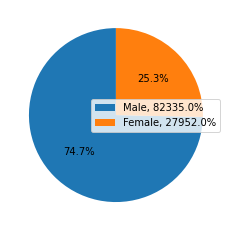

In [474]:
# Task 5-2 Display the pie chart that represents the percentage (%) of trips for each Genders and display percentages in legend respectively
labels=fx['index']
sizes=fx['frequency']
labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, sizes)]
plt.legend(labels=labels)
pie = plt.pie(sizes,autopct='%1.1f%%', startangle=90)
plt.legend( loc = 'right', labels=labels)
plt.show()


## **Task 6: Get the number of trips with each station as the starting point. Sort the start stations by frequency of trips, in descending order.**

If you get the correct code, you will find that for 1719 trips `Streeter Dr & Grand Ave` is the `Starting Station`, which is the most among all stations. 

In [475]:
# Code for Task 6
trips['Start Station'].value_counts().sort_values(ascending=False).reset_index(name='count')

,index,count
0,Streeter Dr & Grand Ave,1719
1,Lake Shore Dr & Monroe St,1211
2,Lincoln Memorial,1112
3,Jefferson Dr & 14th St SW,1042
4,Columbus Circle / Union Station,1011
...,...,...
1611,Stony Island Ave & 75th St,1
1612,Reston Pkwy & Spectrum Dr,1
1613,Deanwood Rec Center,1
1614,White House [17th & State Pl NW],1



## **Task 7: Find the longest trip (in seconds) in our dataset.**


In [476]:
# Code for Task 7
trips.sort_values(by='Trip Duration',ascending=False).head(1)

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
101972,2017-05-03 05:31:39,2017-05-13 11:31:06,885567.607,19th St & Constitution Ave NW,23rd & E St NW,Customer,Unknown,-1


## **Task 8: Find the start station and end staion for the longest trip.**

If your code is correct, it should show the start and the end stations are __19th St & Constitution Ave NW__ and __23rd & E St NW__, respectively.

In [477]:
# Code for Task 8
trips.sort_values(by='Trip Duration',ascending=False).head(1)[['Start Station','End Station']]

,Start Station,End Station
101972,19th St & Constitution Ave NW,23rd & E St NW


In [478]:
#Display the countplot of  the  5 top  Trip Duration for each gender
gender_group=trips.groupby('Gender')['Trip Duration'].nlargest(5)[0:10].reset_index()

In [479]:
trips.groupby('Gender')['Trip Duration'].nlargest(5)

Gender         
Female   146219    217524.000
         157915    108950.000
         126611     77918.000
         132936     70447.000
         131771     61087.000
Male     153187    249141.000
         159480    144628.000
         165370     93702.000
         182812     80153.000
         132588     68176.000
Unknown  101972    885567.607
         113912    699624.277
         160343    499410.000
         126646    439090.000
         108794    405988.610
Name: Trip Duration, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

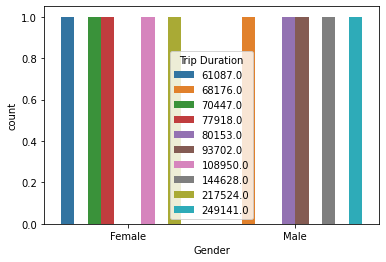

In [480]:
sns.countplot(x='Gender',data=gender_group,hue='Trip Duration')

<Axes: xlabel='Gender', ylabel='Trip Duration'>

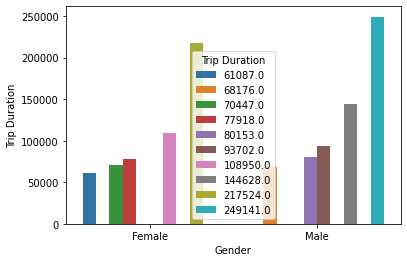

In [481]:
####Display the countplot of  the  5 top  Trip Duration for each gender
sns.barplot(x='Gender',data=gender_group,y='Trip Duration',hue='Trip Duration')

We want to analyze the user base of the vehicle sharing service, especially their age. For that let's create an `Age` column based on `Birth Year`. Since the trips all took place in May 2017, we should calculate the users' ages then (i.e., 2017) instead of now.

## **Task 9: Create a column `Age` using `Birth Year`.**




In [482]:
# Code for Task 9
trips['Age']=2017-trips['Birth Year']
trips

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Age
0,2017-05-25 18:19:03,2017-05-25 18:45:53,1610.0,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,25
1,2017-05-26 09:41:44,2017-05-26 09:46:25,281.0,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983,34
2,2017-05-30 15:46:18,2017-05-30 15:52:12,354.0,Larrabee St & Kingsbury St,Clark St & Elm St,Subscriber,Male,1985,32
3,2017-05-25 22:59:33,2017-05-25 23:07:19,466.0,Clark St & Armitage Ave,Sheffield Ave & Wrightwood Ave,Subscriber,Female,1985,32
4,2017-05-03 13:20:38,2017-05-03 13:31:13,635.0,Ada St & Washington Blvd,Daley Center Plaza,Subscriber,Male,1967,50
...,...,...,...,...,...,...,...,...,...
191958,2017-05-23 18:13:27,2017-05-23 18:47:39,2052.0,West Thames St,12 Ave & W 40 St,Subscriber,Male,1972,45
191959,2017-05-06 19:58:38,2017-05-06 20:14:10,932.0,Hanson Pl & Ashland Pl,Willoughby Ave & Tompkins Ave,Subscriber,Female,1982,35
191960,2017-05-22 21:09:03,2017-05-22 21:14:56,352.0,Wythe Ave & Metropolitan Ave,Devoe St & Lorimer St,Subscriber,Male,1972,45
191961,2017-05-14 12:43:21,2017-05-14 12:57:51,869.0,Cumberland St & Lafayette Ave,Plaza St West & Flatbush Ave,Subscriber,Female,1991,26


In Task 3 we replaced null values in `Birth Year` with -1. Some of the `Age` values thus incorrectly become 2018. We need to replace them with -1 again.

In [483]:
trips['Age'] = trips['Age'].replace(2018, -1)

Run the following code cell so that, even if your code in preceding tasks messed up the data, it will not affect the ensuing tasks.

In [484]:
import pandas as pd
#load the file task9.pkl into a dataframe trips
trips = pd.read_pickle("/content/task9.pkl")

Now let's create a categorical feature `Age Group` based on `Age`. We can discretize `Age` into `Child` (for 00-14 years old), `Youth` (for 14-24 years old), `Adult` (for 24-64 years old), and `Senior` (64 years and over). We should set the value of `Age Group` to a string `N/A` if the `Age` value is -1. In every category range, the starting point is inclusive and the endpoint is exclusive. For instance, the `Child` group is for those with `Age` >= 0 and `Age` < 14.

## **Task 10: Create a column `Age Group` and assign string values in this column based on `Age` according to the above description.**

In [485]:
# Code for Task 10
trips['Age Group'] = pd.cut(x=trips['Age'], bins=[-2,-1, 13, 23, 63, 100],labels=[ 'N/A','Child', 'Youth','Adult','Senior'])

In [486]:
trips['Age Group'].value_counts()

Adult     103364
N/A        81462
Youth       4635
Senior      2468
Child          1
Name: Age Group, dtype: int64

Run the following code cell so that, even if your code in preceding tasks messed up the data, it will not affect the ensuing tasks.

In [487]:
import pandas as pd
#load the file task10.pkl into a dataframe trips
trips = pd.read_pickle("/content/task10.pkl")


Our next task attempts to examine the relationship between `Age Group` and average trip time.

## **Task 11: For each value of `Age Group` (except for `N/A`), find the average `Trip Duration`.**

In [488]:
# Code for Task 11-1
age_trip=trips.groupby('Age Group',as_index=False,dropna=True).agg({'Trip Duration':np.mean}).sort_values(by='Trip Duration',ascending=True).iloc[:4,:]
age_trip

,Age Group,Trip Duration
1,Child,639.000000
4,Youth,740.381014
0,Adult,765.169711
3,Senior,784.281887


<Axes: xlabel='Age Group', ylabel='count'>

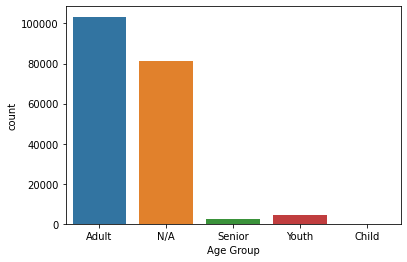

In [489]:
# Code for Task 11-2
#Display the countplot of  the average Trip Duration for each Age Group
sns.countplot(x='Age Group',data=trips)

<Axes: xlabel='Age Group', ylabel='Trip Duration'>

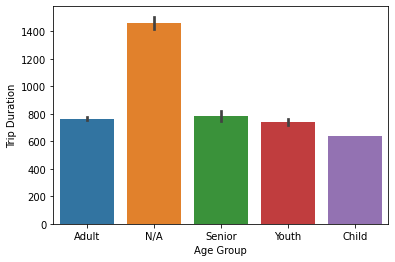

In [490]:
####barplot
sns.barplot(x ='Age Group', y='Trip Duration',data = trips)

## **Task 12: Produce a pivot table of number of trips, using `Gender` for rows and `User type` for columns. Exclude the trips from users whose gender is `Unknown`.**


In [491]:
# Code for Task 12 
pd.pivot_table(trips,index=['Gender'],
                    columns=['User Type'], aggfunc=np.sum).iloc[:2,:]

Age            Birth Year            Trip Duration            
User Type Customer Subscriber   Customer Subscriber      Customer  Subscriber
Gender                                                                       
Female       15606     995268     942469   54425841      751678.0  23172028.0
Male         31219    3073546    1773996  161190934     1338694.0  59038431.0

## **Task 13: Get the average `Trip Duration` for each day of a week. The results should be sorted by average trip duration.**

To decide the day of a trip, we only consider the trip's start time. For instance, if a trip starts on Monday, it is a Monday trip, regardless of when it ends. 



In [492]:
# Code for Task 13-1
trips['Day of Week'] = trips['Start Time'].apply(lambda time: time.dayofweek)
trips['Day of Week'] = trips['Day of Week'].replace(0, 'Monday')
trips['Day of Week'] = trips['Day of Week'].replace(1, 'Tuesday')
trips['Day of Week'] = trips['Day of Week'].replace(2, 'Wednesday')
trips['Day of Week'] = trips['Day of Week'].replace(3, 'Thursday')
trips['Day of Week'] = trips['Day of Week'].replace(4, 'Friday')
trips['Day of Week'] = trips['Day of Week'].replace(5, 'Saturday')
trips['Day of Week'] = trips['Day of Week'].replace(6, 'Sunday')
df2=trips.groupby('Day of Week',as_index=False).agg({'Trip Duration':'mean'})
df2


,Day of Week,Trip Duration
0,Friday,964.368331
1,Monday,1092.311058
2,Saturday,1344.448537
3,Sunday,1382.117428
4,Thursday,898.084620
5,Tuesday,918.600529
6,Wednesday,940.540680


<Axes: xlabel='Day of Week', ylabel='count'>

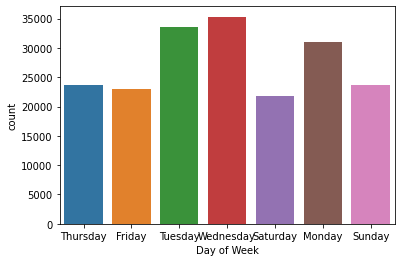

In [493]:
# Code for Task 13-2
#Display the countplot of  the average Trip Duration for each day of a week
sns.countplot(x='Day of Week',data=trips)

<Axes: xlabel='Day of Week', ylabel='Trip Duration'>

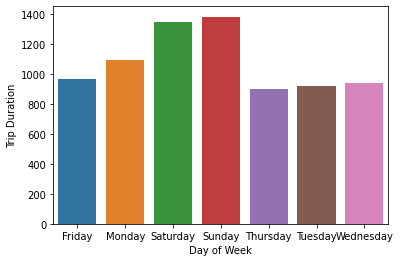

In [494]:
###barplot
sns.barplot(x ='Day of Week', y='Trip Duration',data = df2)

## **Task 14: Get the three most popular trip routes, in terms of `Start Station` and `End Station`**


In [495]:
# Code for Task 14-1
trips[['Start Station','End Station']].value_counts()[:3].reset_index(name='count')

,Start Station,End Station,count
0,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,255
1,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,172
2,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,165


In [496]:
# Task 14-2 find out which gender of users used the three most popular trip routes more often.
trips.rename(columns = {'Start Station':'Start_Station','End Station':'End_Station'}, inplace = True)
pop_route=trips[((trips.Start_Station =='Lake Shore Dr & Monroe St') & (trips.End_Station =='Streeter Dr & Grand Ave')) | ((trips.Start_Station =='Streeter Dr & Grand Ave') & (trips.End_Station =='Streeter Dr & Grand Ave')) | ((trips.Start_Station =='Lake Shore Dr & Monroe St') & (trips.End_Station =='Lake Shore Dr & Monroe St'))]
pop_route[['Gender']].value_counts().reset_index(name='count')[1:]


,Gender,count
1,Male,54
2,Female,13


<Axes: xlabel='Gender', ylabel='count'>

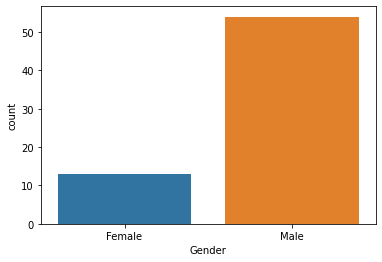

In [497]:
# Task 14-3: Display the countplot of the three most popular trip routes more often for  each of the genders 
sns.countplot(x='Gender',data=pop_route[(pop_route.Gender=='Male') | (pop_route.Gender=='Female')])